# Load & Info

In [150]:
import pandas as pd
import numpy as np

# Load the sessions dataset
sessions = pd.read_csv('../data/sessions.csv')
train_user = pd.read_csv('../data/train_user.csv')

In [133]:
# Explore the dataset
print(sessions.head())

      user_id          action action_type        action_detail  \
0  d1mm9tcy42          lookup         NaN                  NaN   
1  d1mm9tcy42  search_results       click  view_search_results   
2  d1mm9tcy42          lookup         NaN                  NaN   
3  d1mm9tcy42  search_results       click  view_search_results   
4  d1mm9tcy42          lookup         NaN                  NaN   

       device_type  secs_elapsed  
0  Windows Desktop         319.0  
1  Windows Desktop       67753.0  
2  Windows Desktop         301.0  
3  Windows Desktop       22141.0  
4  Windows Desktop         435.0  


In [ ]:
print(sessions.info())

# Count Occurrences

In [ ]:
total_actions = len(sessions)
print("Total Number of Actions:", total_actions)

In [ ]:
# Group by 'action' column and count occurrences
action_counts = sessions["action"].count()

# Show the action counts
action_counts

In [ ]:
sessions['action'].value_counts().sum()

In [ ]:
sessions['action'].value_counts().head(50)

# Number of Action

In [145]:
unique_actions = sessions['action'].nunique()
print("Number of Unique Action Types:", unique_actions)

Number of Unique Action Types: 359


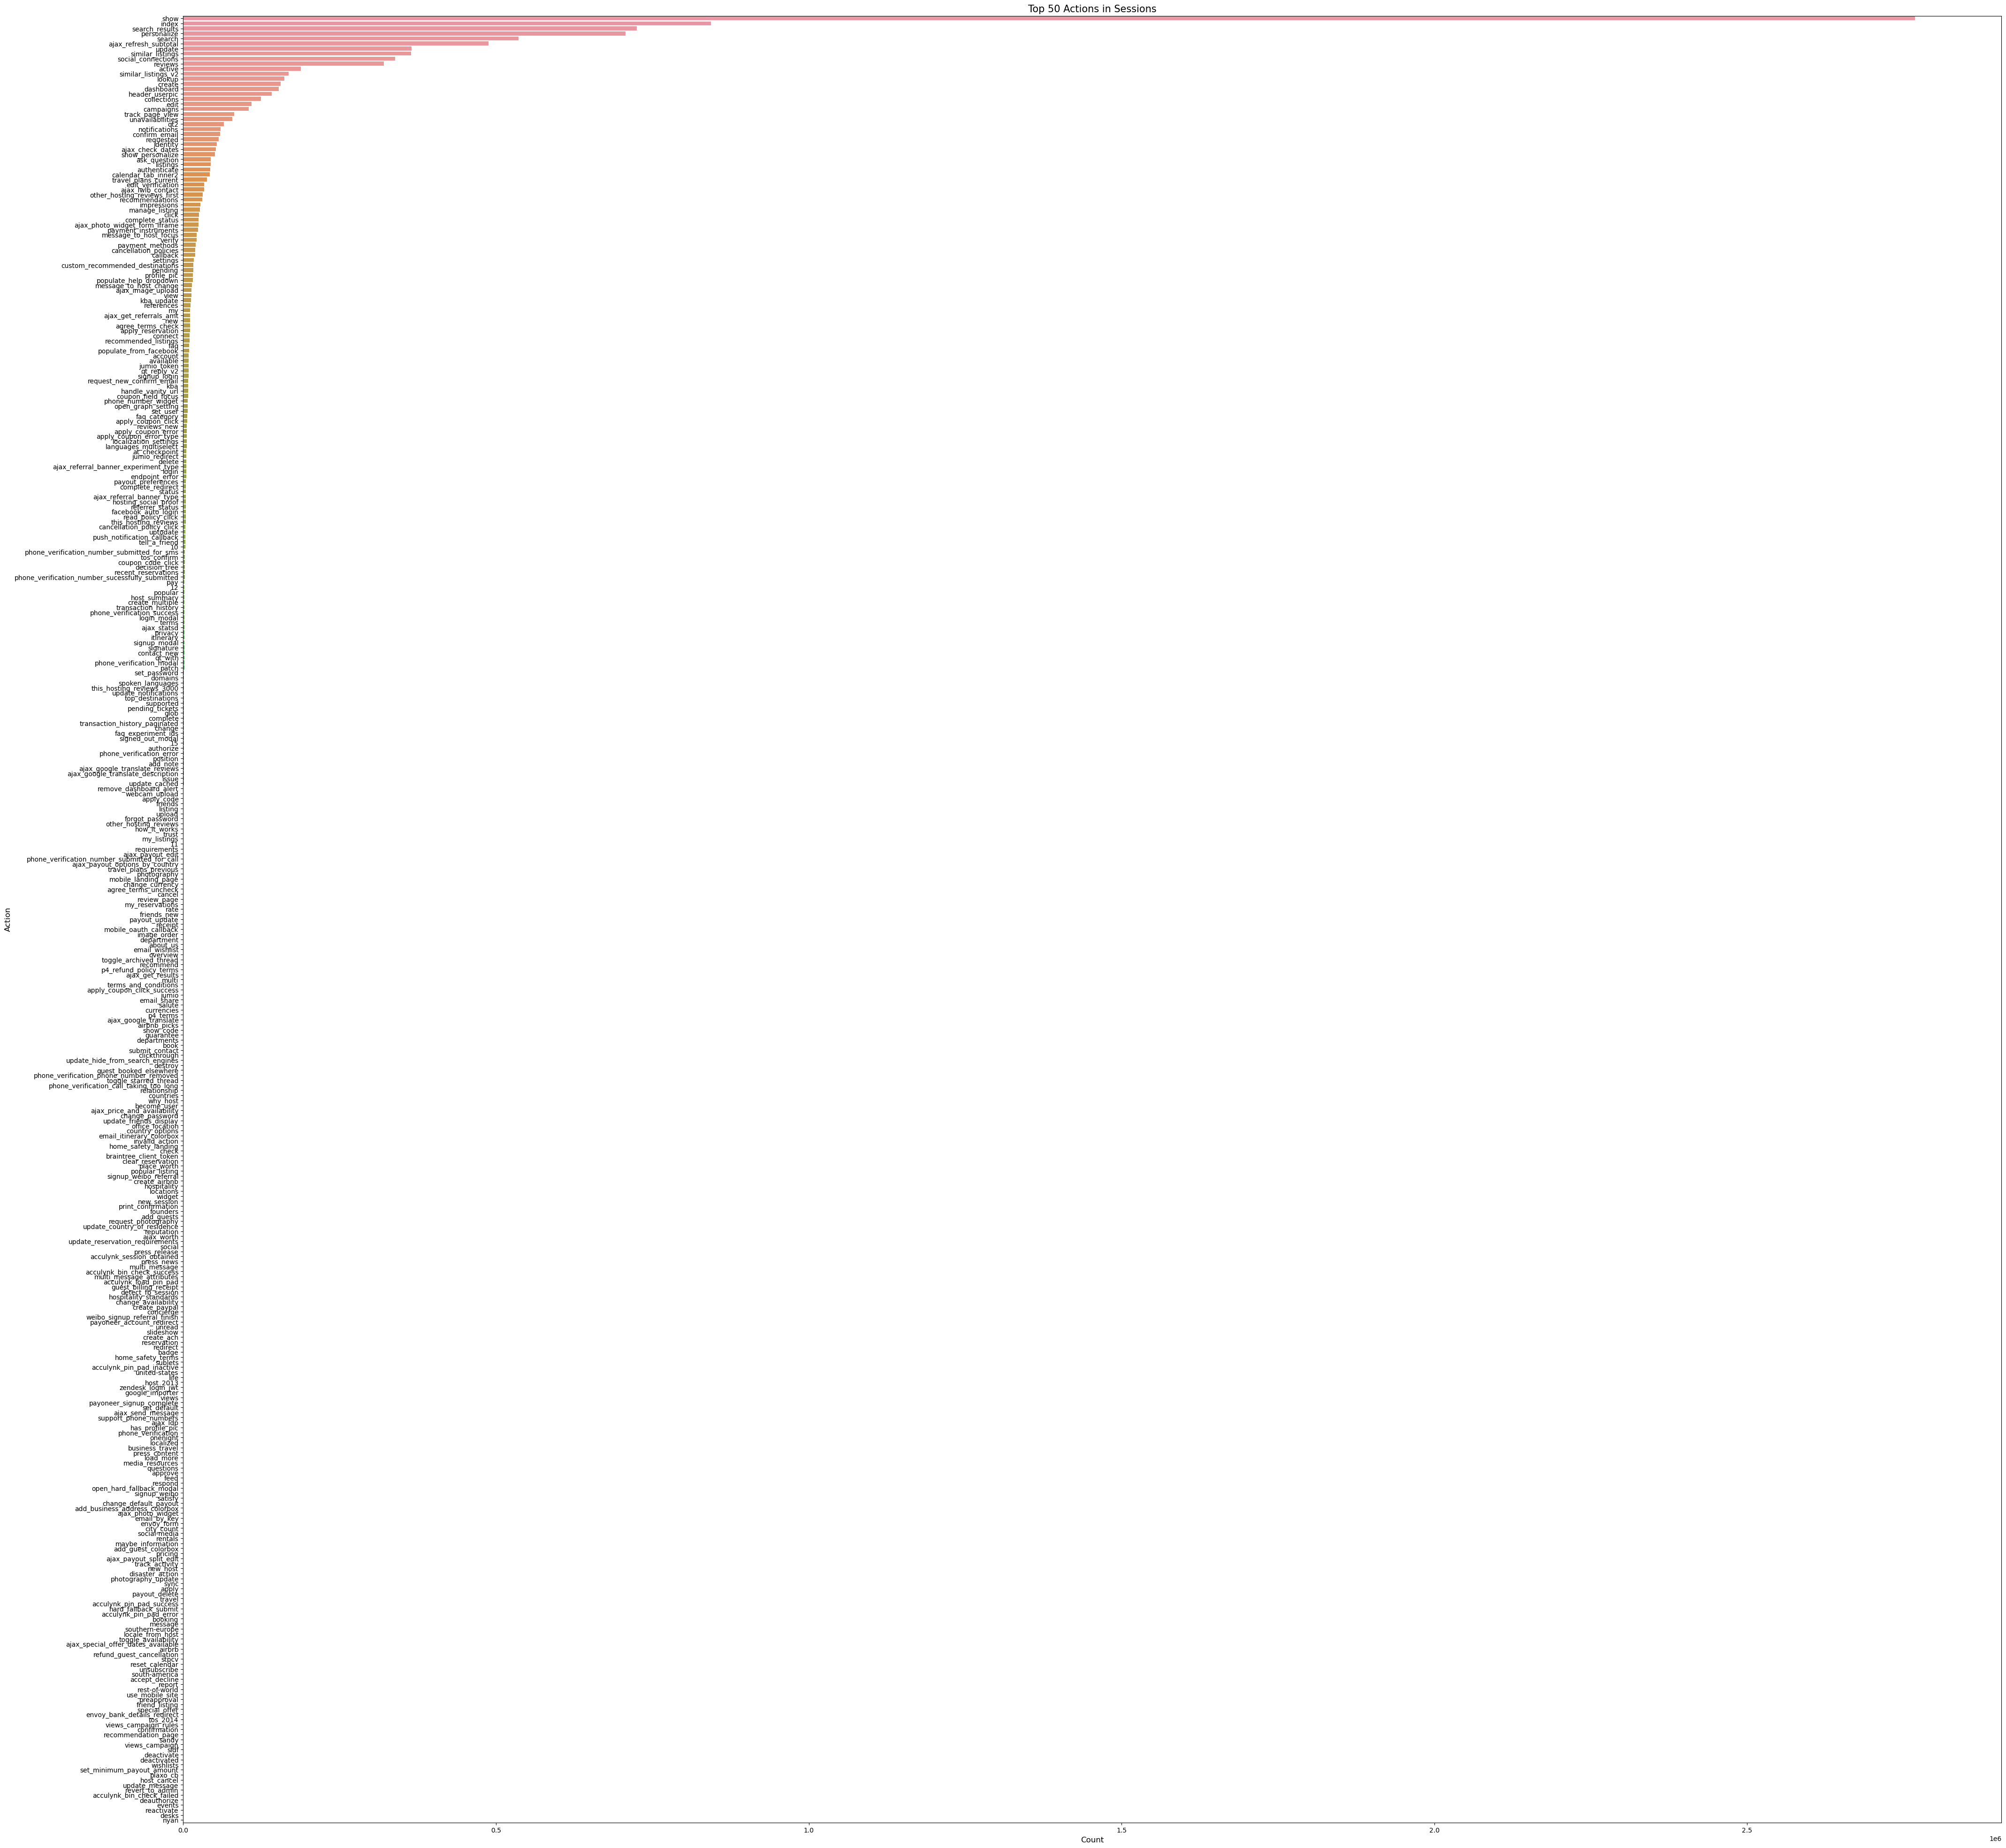

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 15 actions
top_actions = sessions['action'].value_counts()

plt.subplots(figsize=(50, 50))
sns.barplot(y=top_actions.index, x=top_actions.values)
plt.title("Top 50 Actions in Sessions", size=15)
plt.xlabel("Count", size=12)
plt.ylabel("Action", size=12)
plt.show()

In [136]:
top_actions = sessions['action'].value_counts().head(1).index.tolist()
filtered_sessions = sessions[sessions['action'].isin(top_actions)]

filtered_sessions

,user_id,action,action_type,action_detail,device_type,secs_elapsed
18,d1mm9tcy42,show,NaN,NaN,Windows Desktop,86.0
20,d1mm9tcy42,show,view,p3,Windows Desktop,83251.0
28,d1mm9tcy42,show,NaN,NaN,Windows Desktop,102.0
30,d1mm9tcy42,show,view,p3,Windows Desktop,2959.0
32,d1mm9tcy42,show,NaN,NaN,Windows Desktop,39.0
...,...,...,...,...,...,...
10567687,fa6260ziny,show,NaN,NaN,Windows Desktop,62.0
10567697,fa6260ziny,show,NaN,NaN,Windows Desktop,30.0
10567706,87k0fy4ugm,show,NaN,NaN,Mac Desktop,1083.0
10567712,87k0fy4ugm,show,view,p3,Mac Desktop,21062.0


In [137]:
# filtered_sessions.to_csv('filtered_sessions.csv',index=False)

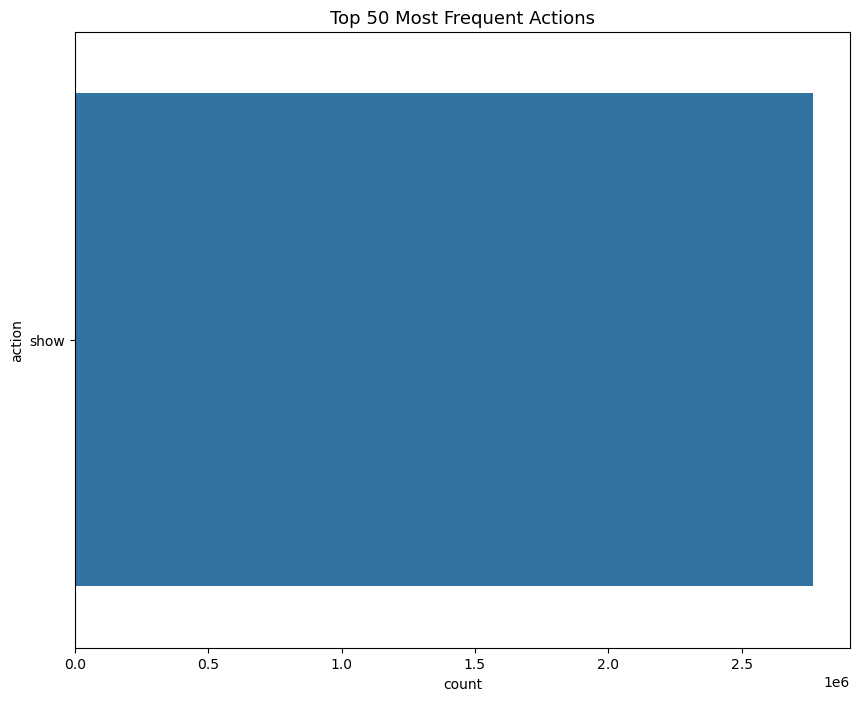

In [138]:
plt.subplots(figsize=(10, 8))
sns.countplot(y='action', data=filtered_sessions)
plt.title("Top 50 Most Frequent Actions", size=13)
plt.show()

# Take the most frequent action of the user

In [151]:
import pandas as pd

# Group by user_id and calculate the mode of action for each user
most_frequent_actions = sessions.groupby('user_id')['action'].apply(lambda x: x.mode()[0] if len(x.mode()) > 0 else None).reset_index()

# Rename columns
most_frequent_actions.columns = ['user_id', 'most_frequent_action']

# Display the result
print(most_frequent_actions)

           user_id most_frequent_action
0       00023iyk9l                 show
1       0010k6l0om                 show
2       001wyh0pz8               search
3       0028jgx1x1                 show
4       002qnbzfs5                 show
...            ...                  ...
135478  zzxox7jnrx       search_results
135479  zzy7t0y9cm          personalize
135480  zzysuoqg6x               create
135481  zzywmcn0jv                 show
135482  zzzlylp57e                 show

[135483 rows x 2 columns]


In [148]:
# Assuming most_frequent_actions is the DataFrame containing user_id and most_frequent_action
# Calculate the frequency of each action type
action_frequency = most_frequent_actions['most_frequent_action'].value_counts()

# Sort actions by frequency in descending order
sorted_actions = action_frequency.index

plt.subplots(figsize=(100, 100))
sns.countplot(y='most_frequent_action', data=most_frequent_actions, order=sorted_actions)
plt.title("Most Frequent Actions", size=13)
plt.show()

In [152]:
most_frequent_actions.to_csv('../data/most_frequent_actions.csv',index=False)

# Cleaning

In [153]:
print(sessions.shape)

sessions = sessions.dropna(subset = ['user_id'])

print(sessions.shape)

(10567737, 6)
(10533241, 6)


In [154]:
sessions['user_id'].nunique()

135483

In [155]:
sessions['device_type'].unique()

array(['Windows Desktop', '-unknown-', 'Mac Desktop', 'Android Phone',
       'iPhone', 'iPad Tablet', 'Android App Unknown Phone/Tablet',
       'Linux Desktop', 'Tablet', 'Chromebook', 'Blackberry', 'iPodtouch',
       'Windows Phone', 'Opera Phone'], dtype=object)

In [156]:
#https://stackoverflow.com/questions/34776651/concatenate-rows-of-pandas-dataframe-with-same-id

session_df_concat = sessions.groupby('user_id', as_index=False).agg(lambda x: x.tolist())

print(session_df_concat.shape)

session_df_concat.head()

(135483, 6)


,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,00023iyk9l,"[index, dashboard, header_userpic, dashboard, ...","[view, view, data, view, partner_callback, mes...","[view_search_results, dashboard, header_userpi...","[Mac Desktop, Mac Desktop, Mac Desktop, Mac De...","[20438.0, 787.0, 850.0, 934.0, nan, 129817.0, ..."
1,0010k6l0om,"[search_results, show, personalize, show, sear...","[click, view, data, nan, click, click, nan, da...","[view_search_results, p3, wishlist_content_upd...","[Mac Desktop, Mac Desktop, Mac Desktop, Mac De...","[1708.0, 21260.0, 1223.0, 26.0, 847.0, 1230.0,..."
2,001wyh0pz8,"[search, search, search, show, social_connecti...","[click, click, click, view, data, -unknown-, v...","[view_search_results, view_search_results, vie...","[Android App Unknown Phone/Tablet, Android App...","[622.0, 1813.0, 1507.0, 6327.0, 927.0, 142.0, ..."
3,0028jgx1x1,"[show, reviews, show, search, show, search, re...","[view, data, view, click, view, click, data, s...","[user_profile, listing_reviews, p3, view_searc...","[-unknown-, -unknown-, -unknown-, -unknown-, -...","[6162.0, 75.0, 86.0, 13710.0, 25217.0, 10989.0..."
4,002qnbzfs5,"[social_connections, payment_methods, create, ...","[data, -unknown-, -unknown-, view, data, data,...","[user_social_connections, -unknown-, -unknown-...","[iPhone, iPhone, iPhone, iPhone, iPhone, iPhon...","[17135.0, 711.0, 274.0, 179.0, 483.0, 1.0, 782..."


In [157]:
# Function to convert list into strings

import re

def abcd(action):
    
    """
    Function to convert list into strings
    
    parameters: action 
    
    returns : action  
    
    """
    action = [ str(i) for i in action ]
    
    action = [ re.sub('nan','',i) for i in action ] 
    
    action = ','.join(action)
    
    return action

In [158]:
session_df_concat['action'] = session_df_concat['action'].apply(abcd)

session_df_concat['action'].head()

0    index,dashboard,header_userpic,dashboard,callb...
1    search_results,show,personalize,show,search_re...
2    search,search,search,show,social_connections,i...
3    show,reviews,show,search,show,search,reviews,c...
4    social_connections,payment_methods,create,show...
Name: action, dtype: object

In [159]:
session_df_concat['action_type'] = session_df_concat['action_type'].apply(abcd)

session_df_concat['action_type'].head()

0    view,view,data,view,partner_callback,message_p...
1    click,view,data,,click,click,,data,view,partne...
2    click,click,click,view,data,-unknown-,view,-un...
3    view,data,view,click,view,click,data,submit,-u...
4    data,-unknown-,-unknown-,view,data,data,data,,...
Name: action_type, dtype: object

In [160]:
session_df_concat['action_detail'] = session_df_concat['action_detail'].apply(abcd)

session_df_concat['action_detail'].head()

0    view_search_results,dashboard,header_userpic,d...
1    view_search_results,p3,wishlist_content_update...
2    view_search_results,view_search_results,view_s...
3    user_profile,listing_reviews,p3,view_search_re...
4    user_social_connections,-unknown-,-unknown-,us...
Name: action_detail, dtype: object

In [161]:
# Function to convert list into strings

def efgh(device):
    
    """
    Function to convert list into strings
    
    parameters: device 
    
    returns : device  
    
    """
    
    device = [ str(i) for i in device ]
    
    device = [ re.sub('nan','',i) for i in device ] 
                
    device = ','.join(set(device))
    
    return device

In [162]:
session_df_concat['device_type'] = session_df_concat['device_type'].apply(efgh)

session_df_concat['device_type'].head()

0                  Mac Desktop,iPhone
1                         Mac Desktop
2    Android App Unknown Phone/Tablet
3             -unknown-,Android Phone
4                    -unknown-,iPhone
Name: device_type, dtype: object

In [163]:
# Function to convert list into strings

def ijkl(time):
    
    """
    Function to convert list into strings
    
    parameters: time 
    
    returns : time  
    
    """
    
    float_time = []
    
    time = [ str(i) for i in time ]
    
    time = [ re.sub('nan','',i) for i in time ] 
        
    for i in time:
        
         try:
                
                float_time.append(float(i))
         
         except ValueError:
                
                continue
    
    float_time = sum(float_time)
    
    return float_time

In [164]:
session_df_concat['secs_elapsed'] = session_df_concat['secs_elapsed'].apply(ijkl)

session_df_concat['secs_elapsed'].head()

0     867896.0
1     586543.0
2     282965.0
3     297010.0
4    6487080.0
Name: secs_elapsed, dtype: float64

In [165]:
print(session_df_concat.shape)

session_df_concat.head()

(135483, 6)


,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,00023iyk9l,"index,dashboard,header_userpic,dashboard,callb...","view,view,data,view,partner_callback,message_p...","view_search_results,dashboard,header_userpic,d...","Mac Desktop,iPhone",867896.0
1,0010k6l0om,"search_results,show,personalize,show,search_re...","click,view,data,,click,click,,data,view,partne...","view_search_results,p3,wishlist_content_update...",Mac Desktop,586543.0
2,001wyh0pz8,"search,search,search,show,social_connections,i...","click,click,click,view,data,-unknown-,view,-un...","view_search_results,view_search_results,view_s...",Android App Unknown Phone/Tablet,282965.0
3,0028jgx1x1,"show,reviews,show,search,show,search,reviews,c...","view,data,view,click,view,click,data,submit,-u...","user_profile,listing_reviews,p3,view_search_re...","-unknown-,Android Phone",297010.0
4,002qnbzfs5,"social_connections,payment_methods,create,show...","data,-unknown-,-unknown-,view,data,data,data,,...","user_social_connections,-unknown-,-unknown-,us...","-unknown-,iPhone",6487080.0


## Join train and session df

In [166]:
train_merge = train_user.merge(most_frequent_actions, left_on='id', right_on='user_id', how='inner')

print("Train  :",train_user.shape)

print("Session:",most_frequent_actions.shape)

print("Merge  :",train_merge.shape)

print("No of users in Train Data with session info:",train_merge.shape[0])

print("{} / {} = {}".format(train_merge.shape[0],train_user.shape[0],np.round((train_merge.shape[0]/train_user.shape[0]),2)))

Train  : (66855, 16)
Session: (135483, 2)
Merge  : (22279, 18)
No of users in Train Data with session info: 22279
22279 / 66855 = 0.33


In [167]:
print(train_merge.columns)

train_merge.head()

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination', 'user_id',
       'most_frequent_action'],
      dtype='object')


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,user_id,most_frequent_action
0,d1mm9tcy42,2014-01-01,2014-01-01,2014-01-04,MALE,62,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,d1mm9tcy42,show
1,xwxei6hdk4,2014-01-01,2014-01-01,2014-01-07,FEMALE,32,facebook,0,en,seo,google,linked,Web,iPad,Mobile Safari,US,xwxei6hdk4,ask_question
2,ro2stddszp,2014-01-01,2014-01-01,2014-12-04,-unknown-,19,basic,0,en,sem-brand,google,untracked,Web,Mac Desktop,Safari,other,ro2stddszp,personalize
3,awiurksqr3,2014-01-01,2014-01-01,2014-01-02,FEMALE,32,facebook,0,en,direct,direct,untracked,Web,iPad,Mobile Safari,US,awiurksqr3,ask_question
4,ucgks2fyez,2014-01-01,2014-01-01,2014-12-18,-unknown-,76,basic,0,en,seo,yahoo,untracked,Web,iPad,Mobile Safari,other,ucgks2fyez,show


In [168]:
train_merge

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,user_id,most_frequent_action
0,d1mm9tcy42,2014-01-01,2014-01-01,2014-01-04,MALE,62,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,d1mm9tcy42,show
1,xwxei6hdk4,2014-01-01,2014-01-01,2014-01-07,FEMALE,32,facebook,0,en,seo,google,linked,Web,iPad,Mobile Safari,US,xwxei6hdk4,ask_question
2,ro2stddszp,2014-01-01,2014-01-01,2014-12-04,-unknown-,19,basic,0,en,sem-brand,google,untracked,Web,Mac Desktop,Safari,other,ro2stddszp,personalize
3,awiurksqr3,2014-01-01,2014-01-01,2014-01-02,FEMALE,32,facebook,0,en,direct,direct,untracked,Web,iPad,Mobile Safari,US,awiurksqr3,ask_question
4,ucgks2fyez,2014-01-01,2014-01-01,2014-12-18,-unknown-,76,basic,0,en,seo,yahoo,untracked,Web,iPad,Mobile Safari,other,ucgks2fyez,show
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22274,7plqriggxp,2014-06-30,2014-06-30,2014-06-30,-unknown-,55,basic,0,en,sem-brand,google,omg,Web,Android Tablet,IE,FR,7plqriggxp,index
22275,msucfwmlzc,2014-06-30,2014-06-30,2015-03-16,MALE,43,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Firefox,US,msucfwmlzc,cancellation_policies
22276,omlc9iku7t,2014-06-30,2014-06-30,2014-08-13,FEMALE,34,basic,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,ES,omlc9iku7t,search_results
22277,0k26r3mir0,2014-06-30,2014-06-30,2014-07-13,FEMALE,36,basic,0,en,sem-brand,google,linked,Web,Mac Desktop,Safari,US,0k26r3mir0,show


In [169]:
#Checking null values
train_merge.isnull().sum()

id                           0
date_account_created         0
timestamp_first_active       0
date_first_booking           0
gender                       0
age                          0
signup_method                0
signup_flow                  0
language                     0
affiliate_channel            0
affiliate_provider           0
first_affiliate_tracked      0
signup_app                   0
first_device_type            0
first_browser                0
country_destination          0
user_id                      0
most_frequent_action       123
dtype: int64

## Delete Missing Value

In [170]:
train_merge.dropna(subset=['most_frequent_action'], inplace=True)

In [171]:
#Checking null values
train_merge.isnull().sum()

id                         0
date_account_created       0
timestamp_first_active     0
date_first_booking         0
gender                     0
age                        0
signup_method              0
signup_flow                0
language                   0
affiliate_channel          0
affiliate_provider         0
first_affiliate_tracked    0
signup_app                 0
first_device_type          0
first_browser              0
country_destination        0
user_id                    0
most_frequent_action       0
dtype: int64

## Drop columns

In [172]:
train_merge = train_merge.drop(columns=['id','user_id'])

In [173]:
train_merge

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,most_frequent_action
0,2014-01-01,2014-01-01,2014-01-04,MALE,62,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,show
1,2014-01-01,2014-01-01,2014-01-07,FEMALE,32,facebook,0,en,seo,google,linked,Web,iPad,Mobile Safari,US,ask_question
2,2014-01-01,2014-01-01,2014-12-04,-unknown-,19,basic,0,en,sem-brand,google,untracked,Web,Mac Desktop,Safari,other,personalize
3,2014-01-01,2014-01-01,2014-01-02,FEMALE,32,facebook,0,en,direct,direct,untracked,Web,iPad,Mobile Safari,US,ask_question
4,2014-01-01,2014-01-01,2014-12-18,-unknown-,76,basic,0,en,seo,yahoo,untracked,Web,iPad,Mobile Safari,other,show
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22274,2014-06-30,2014-06-30,2014-06-30,-unknown-,55,basic,0,en,sem-brand,google,omg,Web,Android Tablet,IE,FR,index
22275,2014-06-30,2014-06-30,2015-03-16,MALE,43,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Firefox,US,cancellation_policies
22276,2014-06-30,2014-06-30,2014-08-13,FEMALE,34,basic,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,ES,search_results
22277,2014-06-30,2014-06-30,2014-07-13,FEMALE,36,basic,0,en,sem-brand,google,linked,Web,Mac Desktop,Safari,US,show


In [121]:
# saving
train_merge.to_csv('../data/train_merge.csv',index=False)

## Type

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

label_encoder = LabelEncoder()

# Encode each column of strings separately
train_merge['gender'] = label_encoder.fit_transform(train_merge['gender'])
train_merge['signup_method'] = label_encoder.fit_transform(train_merge['signup_method'])
train_merge['language'] = label_encoder.fit_transform(train_merge['language'])
train_merge['affiliate_channel'] = label_encoder.fit_transform(train_merge['affiliate_channel'])
train_merge['affiliate_provider'] = label_encoder.fit_transform(train_merge['affiliate_provider'])
train_merge['first_affiliate_tracked'] = label_encoder.fit_transform(train_merge['first_affiliate_tracked'])
train_merge['signup_app'] = label_encoder.fit_transform(train_merge['signup_app'])
train_merge['first_device_type'] = label_encoder.fit_transform(train_merge['first_device_type'])
train_merge['first_browser'] = label_encoder.fit_transform(train_merge['first_browser'])
train_merge['most_frequent_action'] = label_encoder.fit_transform(train_merge['most_frequent_action'])
train_merge['country_destination'] = label_encoder.fit_transform(train_merge['country_destination'])

In [175]:
train_merge['date_account_created'] = pd.to_datetime(train_merge['date_account_created'])
train_merge['timestamp_first_active'] = pd.to_datetime(train_merge['timestamp_first_active'])
train_merge['date_first_booking'] = pd.to_datetime(train_merge['date_first_booking'])

In [176]:
train_merge.dtypes

date_account_created       datetime64[ns]
timestamp_first_active     datetime64[ns]
date_first_booking         datetime64[ns]
gender                              int32
age                                 int64
signup_method                       int32
signup_flow                         int64
language                            int32
affiliate_channel                   int32
affiliate_provider                  int32
first_affiliate_tracked             int32
signup_app                          int32
first_device_type                   int32
first_browser                       int32
country_destination                 int32
most_frequent_action                int32
dtype: object

In [177]:
train_merge = train_merge.drop(['date_account_created','timestamp_first_active','date_first_booking'], axis=1)

In [178]:
train_merge.to_csv('../data/train_merge.csv',index=False)

# Data Preprocessing

In [125]:
y = train_merge['country_destination']

X = train_merge.drop(columns=['country_destination'])

In [126]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.4, random_state=0)
X_test.shape

(8863, 15)

In [127]:
print(X_train.dtypes)

date_account_created       datetime64[ns]
timestamp_first_active     datetime64[ns]
date_first_booking         datetime64[ns]
gender                              int32
age                                 int64
signup_method                       int32
signup_flow                         int64
language                            int32
affiliate_channel                   int32
affiliate_provider                  int32
first_affiliate_tracked             int32
signup_app                          int32
first_device_type                   int32
first_browser                       int32
most_frequent_action                int32
dtype: object


In [128]:
print(y_train.dtypes)

int32


# selector1

In [129]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selector = SelectKBest(chi2, k='all')
selector.fit(X_train, y_train)

selected_feature_indices = selector.get_support(indices=True)

selected_feature_names = X_train.columns[selected_feature_indices]
print(selected_feature_names)

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[int64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>)

In [130]:
# Mutual Information : utilisée pour évaluer la relation entre chaque caractéristique et la variable cible.
# Elle mesure la quantité d'information que chaque caractéristique fournit sur la variable cible.

from sklearn.feature_selection import mutual_info_classif

mutual_info= mutual_info_classif(X_train, y_train)
mutual_info = pd.Series (mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[int64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>)

## selector2

In [87]:
# SelectPercentile : est une approche de sélection de caractéristiques permet de sélectionner un pourcentage spécifique
# des caractéristiques les plus importantes en fonction d'un test statistique.
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression

selector2 = SelectPercentile(f_regression, percentile=60)

selector2.fit(X, y)

selected_feature_indices2 = selector2.get_support(indices=True)

selected_feature_names2 = X.columns[selected_feature_indices2]

print(selected_feature_names2)

Index(['age', 'signup_method', 'signup_flow', 'language', 'first_device_type',
       'first_browser', 'most_frequent_action'],
      dtype='object')


## selector3

In [90]:
from sklearn.feature_selection import f_classif

# SelectKBest: est une methode de sélection de caractéristiques qui permet de sélectionner les K meilleures caractéristiques
# en fonction d'un test statistique 
selector3 = SelectKBest(f_classif, k='all')
selector3.fit(X, y)

selected_feature_indices = selector3.get_support(indices=True)

selected_feature_names = X.columns[selected_feature_indices]

print(selected_feature_names)

Index(['gender', 'age', 'signup_method', 'signup_flow', 'language',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_device_type', 'first_browser',
       'most_frequent_action'],
      dtype='object')


# accuracy

In [131]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_imputed, y_train)

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[int64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>)

In [99]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train)

# Predict using the trained model
X_test_imputer = imputer.transform(X_test)  # Impute missing values in X_test
y_pred = model.predict(X_test_imputer)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7213133250592351
